In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib

In [2]:
matplotlib.use("TkAgg")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
macbeth_file = 'deep/data/macbeth.txt'

In [5]:
caesar_file = 'deep/data/julius_caesar.txt'

In [6]:
stopword_file = 'deep/data/long_stopwords.txt'

In [7]:
stop_words = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = list(map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp))

In [8]:
type(stop_words)
stop_words_temp

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [9]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [10]:
clean("king's")

'kings'

In [11]:
clean("they'll")

''

In [12]:
line_count = 0
sentences = []

with open(macbeth_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)
            
with open(caesar_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)

In [13]:
type(sentences)

list

In [14]:
sentences

[['1606'],
 [],
 ['tragedy', 'macbeth'],
 [],
 [],
 ['william', 'shakespeare'],
 [],
 [],
 [],
 ['dramatis', 'personae'],
 [],
 ['duncan', 'king', 'scotland'],
 ['macbeth', 'thane', 'glamis', 'cawdor', 'general', 'kings'],
 ['army'],
 ['lady', 'macbeth', 'wife'],
 ['macduff', 'thane', 'fife', 'nobleman', 'scotland'],
 ['lady', 'macduff', 'wife'],
 ['malcolm', 'elder', 'son', 'duncan'],
 ['donalbain', 'younger', 'son', 'duncan'],
 ['banquo', 'thane', 'lochaber', 'general', 'kings', 'army'],
 ['fleance', 'son'],
 ['lennox', 'nobleman', 'scotland'],
 ['ross', 'nobleman', 'scotland'],
 ['menteith', 'nobleman', 'scotland'],
 ['angus', 'nobleman', 'scotland'],
 ['caithness', 'nobleman', 'scotland'],
 ['siward', 'earl', 'northumberland', 'general', 'english', 'forces'],
 ['young', 'siward', 'son'],
 ['seyton', 'attendant', 'macbeth'],
 ['hecate', 'queen', 'witches'],
 ['three', 'witches'],
 ['boy', 'son', 'macduff'],
 ['gentlewoman', 'attending', 'lady', 'macbeth'],
 ['english', 'doctor'],
 [

In [15]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [16]:
model.wv.vocab

{'1': <gensim.models.keyedvectors.Vocab at 0x7f80d31b7810>,
 '19901993': <gensim.models.keyedvectors.Vocab at 0x7f80d31b2390>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f80d31be0d0>,
 'afraid': <gensim.models.keyedvectors.Vocab at 0x7f80d315dad0>,
 'age': <gensim.models.keyedvectors.Vocab at 0x7f80d31d8510>,
 'air': <gensim.models.keyedvectors.Vocab at 0x7f80d3236d50>,
 'alarum': <gensim.models.keyedvectors.Vocab at 0x7f80d31d8450>,
 'alarums': <gensim.models.keyedvectors.Vocab at 0x7f80d31b7510>,
 'alas': <gensim.models.keyedvectors.Vocab at 0x7f80d31be190>,
 'alive': <gensim.models.keyedvectors.Vocab at 0x7f80d32ed090>,
 'ambition': <gensim.models.keyedvectors.Vocab at 0x7f80d3163890>,
 'ambitious': <gensim.models.keyedvectors.Vocab at 0x7f80d31b2b10>,
 'amen': <gensim.models.keyedvectors.Vocab at 0x7f80d3163110>,
 'angry': <gensim.models.keyedvectors.Vocab at 0x7f80d31b74d0>,
 'angus': <gensim.models.keyedvectors.Vocab at 0x7f80d31c4cd0>,
 'anon': <gensim.models.keyedvectors.Voc

In [17]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
    
len(tokens)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


717

In [18]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [19]:
new_values = tsne_model.fit_transform(tokens)

In [20]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

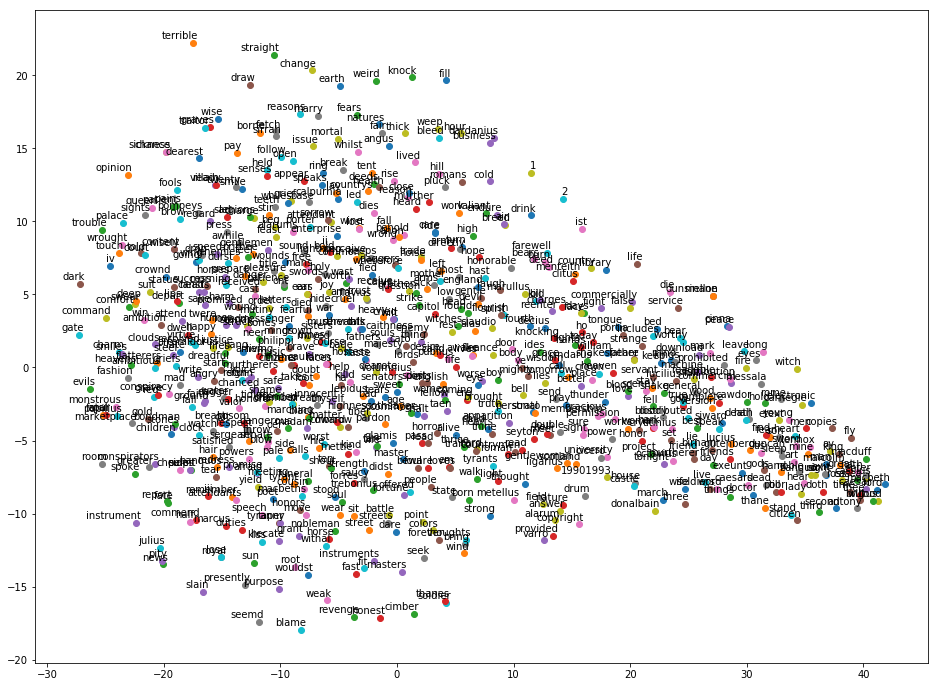

In [21]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [22]:
model.most_similar(positive=['caesar','duncan'],negative=['scotland'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lord', 0.6218435764312744),
 ('brutus', 0.618663489818573),
 ('macbeth', 0.6114180684089661),
 ('cassius', 0.5929856300354004),
 ('good', 0.5908856391906738),
 ('casca', 0.5880151391029358),
 ('enter', 0.5871764421463013),
 ('thee', 0.586646556854248),
 ('malcolm', 0.582690417766571),
 ('great', 0.5787739753723145)]

In [23]:
model.most_similar(positive=['caesar','duncan'],negative=['macbeth'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lord', 0.5809720158576965),
 ('brutus', 0.5560781955718994),
 ('casca', 0.5512785911560059),
 ('mine', 0.5508545637130737),
 ('thee', 0.5505737066268921),
 ('sword', 0.5467771291732788),
 ('good', 0.5454957485198975),
 ('enter', 0.5442748069763184),
 ('cassius', 0.5433430671691895),
 ('exit', 0.5412276983261108)]

In [24]:
model.most_similar(positive=['caesar','macbeth'],negative=['banquo'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lord', 0.6982035040855408),
 ('good', 0.6858804225921631),
 ('cassius', 0.6847048997879028),
 ('brutus', 0.681625247001648),
 ('thee', 0.6761420965194702),
 ('casca', 0.6576300859451294),
 ('macduff', 0.6540749073028564),
 ('great', 0.653334379196167),
 ('enter', 0.6526092886924744),
 ('malcolm', 0.6509706974029541)]

In [25]:
model.most_similar(positive=['rome','scotland'],negative=['banquo'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('good', 0.4072685241699219),
 ('thee', 0.4008970260620117),
 ('lord', 0.39574918150901794),
 ('enter', 0.39298349618911743),
 ('cassius', 0.3921840786933899),
 ('ross', 0.39001327753067017),
 ('brutus', 0.38923490047454834),
 ('caesar', 0.38540366291999817),
 ('eyes', 0.38460829854011536),
 ('lennox', 0.3803260326385498)]

In [26]:
model.doesnt_match("duncan macbeth scotland banquo".split())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'scotland'

In [32]:
req_count = 5
for key in model.wv.similar_by_word('fly', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print key[0], key[1]
        if req_count == 0:
            break;

man 0.666621267796
sir 0.660447478294
son 0.650142967701
art 0.61453640461
tis 0.598906040192
